## 核密度估计

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### KDE的由来： 直方图

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)

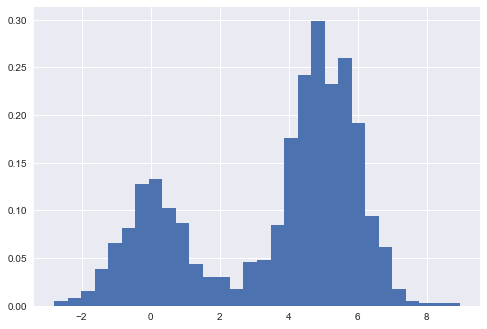

In [6]:
hist = plt.hist(x, bins=30, normed=True)  #一维数据的密度估计——直方图，那是一个简单的密度评估器

In [7]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [8]:
 x = make_data(20)
bins = np.linspace(-5, 10, 10)

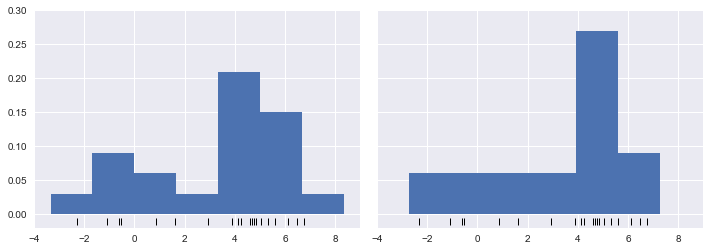

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
sharex=True, sharey=True,
subplot_kw={'xlim':(-4, 9),
'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',    markeredgewidth=1)

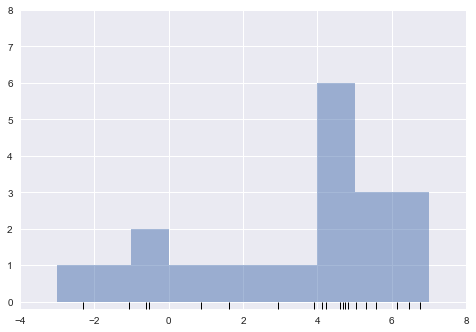

In [10]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',
markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,
        alpha=0.5))
        ax.set_xlim(-4, 8)
        ax.set_ylim(-0.2, 8)

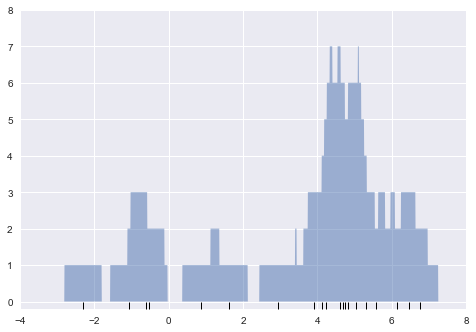

In [11]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

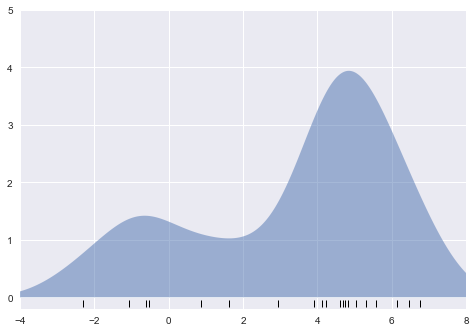

In [12]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5]);

(-0.02, 0.22)

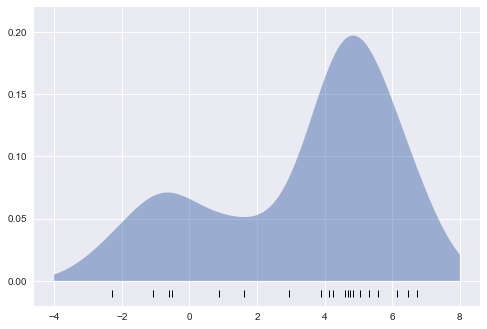

In [13]:
## 使用KernelDensity评估其来重现前面的图像
from sklearn.neighbors import KernelDensity

#初始化兵拟合KDE模型
kde=KernelDensity(bandwidth=1.0,kernel='gaussian')
kde.fit(x[:,None])

# score_samples返回概率密度的对数值
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)
